<a href="https://colab.research.google.com/github/nuraishasb/applied-ml/blob/main/Project_2_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.nus.edu.sg/images/default-source/base/logo.png' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Applied Machine Learning</h1><h2>Project 2 - Machine Learning Models </h2><h3></h3></th>
    </tr>
</table>

In [ ]:
# Import the requried packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, neighbors, tree, svm, ensemble, neural_network
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

In [ ]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/Applied_ML/Projects' # Please adjust the path accordingly
    os.chdir(path_to_file)
    !pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Applied_ML/Projects


In this project, you are required to build below Machine Learning models using supermarket dataset. Data preparation codes are provided already (copied from Project 1), you only need to enter model building/training/tuning codes.

* Decision Tree
* Support Vector
* Ensemble
* Neural Networks

You are strongly encouraged to build at least one model for each category and tune the models properly using various methods, e.g. GridsearchCV and etc.

### Data Preparation (for DT model)

In [ ]:
# Load dataset into a DataFrame
supermarket = pd.read_csv('supermarket.csv')

# Missing Value
supermarket['Outlet_Size'] = supermarket['Outlet_Size'].fillna('Medium')

# Set the "Item_Outlet_Sales" as target/model output and the rest features as model inputs
y = supermarket['Item_Outlet_Sales']
X = supermarket.drop(['Item_Outlet_Sales'], axis=1)

# Split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale down the numerical data (Not Required) and encode the categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

#num_attribs = list(X.select_dtypes(['int64', 'float64']))
cat_attribs = list(X.select_dtypes(['object']))

#scaler = StandardScaler()
encoder = OrdinalEncoder()

X_train = X_train1.copy()
#X_train[num_attribs] = scaler.fit_transform(X_train1[num_attribs])
X_train[cat_attribs] = encoder.fit_transform(X_train1[cat_attribs])

X_test = X_test1.copy()
#X_test[num_attribs] = scaler.transform(X_test1[num_attribs])
X_test[cat_attribs] = encoder.transform(X_test1[cat_attribs])

### Decision Tree Model

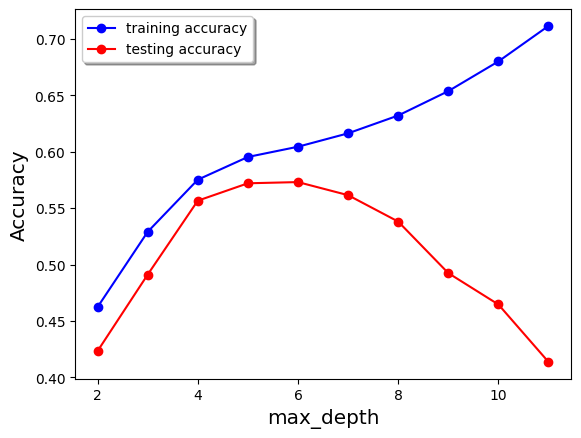

In [ ]:
# Find the best max_depth
depth_range = range(2,12) # ranges from 2 to 12
train_accuracy = []
test_accuracy = []

for d in depth_range:
    dt_reg = tree.DecisionTreeRegressor(max_depth=d)
    dt_reg.fit(X_train, y_train)
    train_accuracy.append(dt_reg.score(X_train, y_train))
    test_accuracy.append(dt_reg.score(X_test, y_test))

#Plot the train & test accuracy
plt.plot(depth_range, train_accuracy, 'bo-', label ='training accuracy')
plt.plot(depth_range, test_accuracy, 'ro-', label = 'testing accuracy')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True)
plt.show()

In [ ]:
#Decision Tree Model
dt_reg = tree.DecisionTreeRegressor(max_depth = 6) # set the best max_depth
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

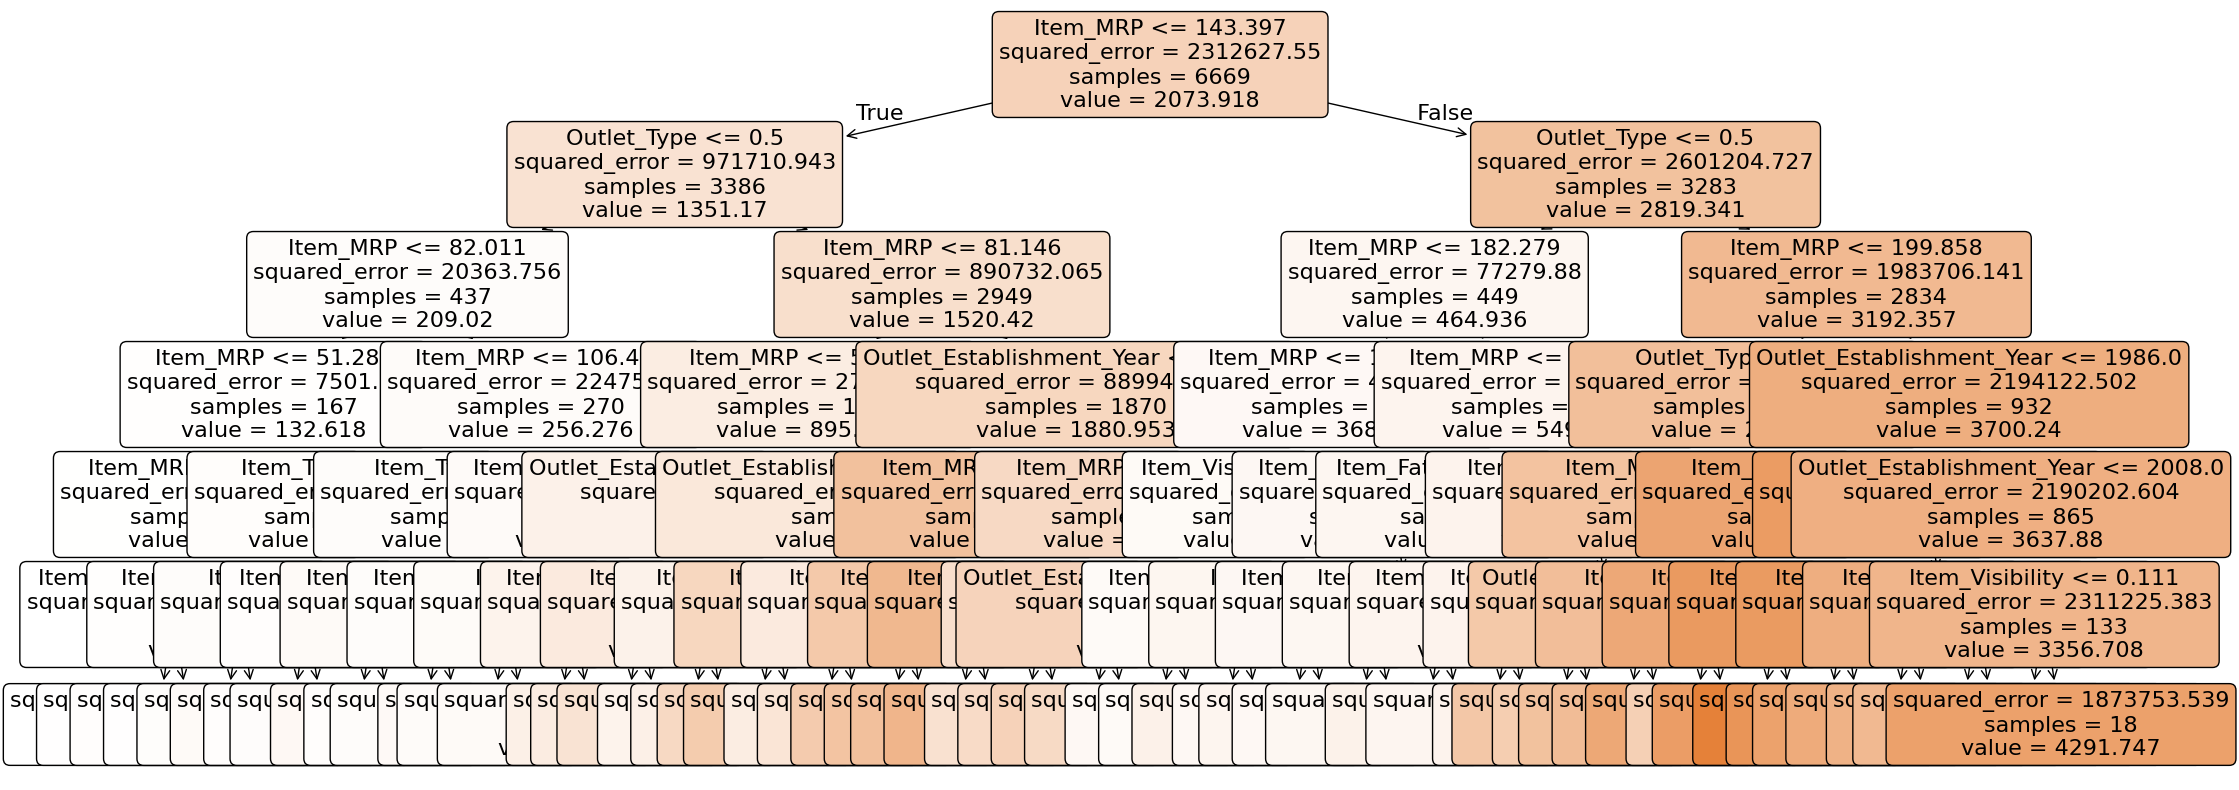

In [ ]:
plt.figure(figsize=(25,10))
tree.plot_tree(dt_reg,
               feature_names = X_train.columns,
               class_names = ['No', 'Yes'],
               rounded = True,
               filled= True,
               fontsize =16)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
print('train_mae:', mean_absolute_error(dt_reg.predict(X_train), y_train),
      '\n test_mae:', mean_absolute_error(dt_reg.predict(X_test), y_test))

train_mae: 689.5526736826946 
 test_mae: 691.063999331525


In [ ]:
# Use GridSearch to find the best combination of model hyperparameters
from sklearn.model_selection import GridSearchCV

dt_reg1 = tree.DecisionTreeRegressor()

param_grid = { "criterion" : ["squared_error", "absolute_error"],
              "min_samples_leaf" : [5, 10, 15],
              "min_samples_split" : [15, 20, 25, 30],
              'max_depth' : [7, 8, 9]
             }

In [ ]:
gs_reg = GridSearchCV(dt_reg1, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 8, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_reg.fit(X_train, y_train)


print(gs_reg.best_score_)
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)

-985131.7455766122
{'criterion': 'squared_error', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 30}
DecisionTreeRegressor(max_depth=7, min_samples_leaf=10, min_samples_split=30)


In [ ]:
#Decision Tree Model
dt_reg = tree.DecisionTreeRegressor(max_depth = 7, min_samples_leaf= 10, min_samples_split= 30) # set the best max_depth
dt_reg.fit(X_train, y_train)

print('train_mae:', mean_absolute_error(dt_reg.predict(X_train), y_train),
      '\n test_mae:', mean_absolute_error(dt_reg.predict(X_test), y_test))

train_mae: 680.3671445973121 
 test_mae: 690.6397654979041


### Data Preparation for the rest

In [ ]:
# Load dataset into a DataFrame
supermarket = pd.read_csv('supermarket.csv')

# Missing Value
supermarket['Outlet_Size'] = supermarket['Outlet_Size'].fillna('Medium')


# Sample a small subset of the data
df = supermarket.sample(3000, random_state =5)

# Set the "Item_Outlet_Sales" as target/model output and the rest features as model inputs
y = df['Item_Outlet_Sales']
X = df.drop(['Item_Outlet_Sales'], axis=1)

# Split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale down the numerical data (Not Required) and encode the categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

num_attribs = list(X.select_dtypes(['int64', 'float64']))
cat_attribs = list(X.select_dtypes(['object']))

scaler = StandardScaler()
encoder = OrdinalEncoder()

X_train = X_train1.copy()
X_train[num_attribs] = scaler.fit_transform(X_train1[num_attribs])
X_train[cat_attribs] = encoder.fit_transform(X_train1[cat_attribs])

X_test = X_test1.copy()
X_test[num_attribs] = scaler.transform(X_test1[num_attribs])
X_test[cat_attribs] = encoder.transform(X_test1[cat_attribs])

### Support Vector Machine

#### Linear Kernel

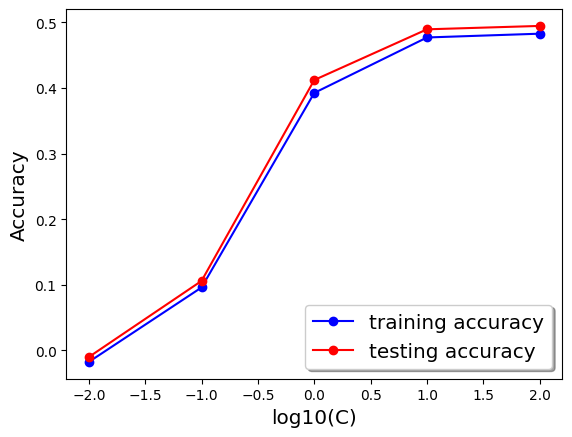

In [ ]:
# finding the best C
C_range = [0.01, 0.1, 1, 10, 100]

train_accuracy = []
test_accuracy = []

for C in C_range:
    svm_reg = svm.SVR(kernel="linear", C=C)
    svm_reg.fit(X_train, y_train)
    train_accuracy.append(svm_reg.score(X_train, y_train))
    test_accuracy.append(svm_reg.score(X_test, y_test))

#Plot the train & test accuracy
plt.plot(np.log10(C_range), train_accuracy, 'bo-', label ='training accuracy')
plt.plot(np.log10(C_range), test_accuracy, 'ro-', label = 'testing accuracy')

plt.xlabel('log10(C)', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [ ]:
#Final Model
svm_reg = svm.SVR(kernel="linear", C=100)
svm_reg.fit(X_train, y_train)

print('train_mae:', mean_absolute_error(svm_reg.predict(X_train), y_train),
      '\n test_mae:', mean_absolute_error(svm_reg.predict(X_test), y_test))

train_mae: 831.5744899589539 
 test_mae: 834.7364482158257


#### Polynomial Kernel

In [ ]:
# Use GridSearch to find the best combination of model hyperparameters
from sklearn.model_selection import GridSearchCV

svm_reg = svm.SVR(kernel="poly")

param_grid = {"degree" : [1, 2, 3, 4, 5],
              "coef0" : [0, 1],  #the intercept of polynomial transformation
              'C' : [ 1, 10, 100, 1000]}

gs_reg = GridSearchCV(svm_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 5, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_reg.fit(X_train, y_train)

print(gs_reg.best_score_)
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)

-1027793.407088652
{'C': 1000, 'coef0': 1, 'degree': 4}
SVR(C=1000, coef0=1, degree=4, kernel='poly')


In [ ]:
#Final Model
svm_reg = gs_reg.best_estimator_
svm_reg.fit(X_train, y_train)

print('train_mae:', mean_absolute_error(svm_reg.predict(X_train), y_train),
      '\n test_mae:', mean_absolute_error(svm_reg.predict(X_test), y_test))

train_mae: 701.8284526895835 
 test_mae: 717.3003394333834


#### RBF Kernel

In [ ]:
# Use GridSearch to find the best combination of model hyperparameters
from sklearn.model_selection import GridSearchCV

svm_reg = svm.SVR(kernel="rbf")

param_grid = {"gamma" : [0.01, 0.1, 1, 10, 100],
              'C' : [ 1, 10, 100, 1000, 10000]}

gs_reg2 = GridSearchCV(svm_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 5, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_reg2.fit(X_train, y_train)

print(gs_reg2.best_score_)
print(gs_reg2.best_params_)
print(gs_reg2.best_estimator_)

-1017749.3109680318
{'C': 10000, 'gamma': 0.01}
SVR(C=10000, gamma=0.01)


In [ ]:
#Final Model
svm_reg = gs_reg2.best_estimator_
svm_reg.fit(X_train, y_train)

print('train_mae:', mean_absolute_error(svm_reg.predict(X_train), y_train),
      '\n test_mae:', mean_absolute_error(svm_reg.predict(X_test), y_test))

train_mae: 698.774313137729 
 test_mae: 717.884453553427


### Ensemble Model

#### Voting Classifier

In [ ]:
# Import necessary regression models
from sklearn import linear_model, tree, svm, ensemble

# building 3 simple different regressors
lr_reg = linear_model.LinearRegression()
dt_reg = tree.DecisionTreeRegressor(max_depth=5, criterion = 'squared_error')
svm_reg = svm.SVR(kernel="rbf", C=100100)

# fit the models to the training data
lr_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)
svm_reg.fit(X_train, y_train)

# voting Regressor
voting_reg = ensemble.VotingRegressor(estimators=[('lr', lr_reg), ('dt', dt_reg), ('svm', svm_reg)])

# fit the voting regressor
voting_reg.fit(X_train, y_train)


from sklearn.metrics import mean_absolute_error
print('train_mae:', mean_absolute_error(voting_reg.predict(X_train), y_train),
      '\n test_mae:', mean_absolute_error(voting_reg.predict(X_test), y_test))

train_mae: 711.3072452162418 
 test_mae: 724.9971901736509


#### Bagging

In [ ]:
# Import necessary modules
from sklearn import ensemble, tree

# Bagging Regressor
bag_reg = ensemble.BaggingRegressor(
    estimator=tree.DecisionTreeRegressor(),  # Using DecisionTreeRegressor as the base model
    n_estimators=254,     # The number of predictors
    max_samples=200,      # The number of random samples to be extracted from the training set for each predictor
    bootstrap=True,       # Using bootstrap sampling
    n_jobs=-1)            # The number of CPU cores to use for training and predictions (–1 tells Scikit-Learn to use all available cores)

# Fit the model to the training data
bag_reg.fit(X_train, y_train)

# Print train and test scores (R^2 scores for regression)
print('train_mae:', mean_absolute_error(bag_reg.predict(X_train), y_train),
      '\n test_mae:', mean_absolute_error(bag_reg.predict(X_test), y_test))

train_mae: 663.9570380767716 
 test_mae: 687.1103357427821


#### Random Forest

In [ ]:
rf_reg = ensemble.RandomForestRegressor()
param_grid = {"n_estimators" : [800, 1000, 1200],
              "max_depth" : [5, 7, 9, 11]}

gs_reg = GridSearchCV(rf_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 5, n_jobs=-1)
gs_reg.fit(X_train, y_train)

print(gs_reg.best_score_)
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)

-982730.651308839
{'max_depth': 5, 'n_estimators': 1000}
RandomForestRegressor(max_depth=5, n_estimators=1000)


In [ ]:
rf_reg = gs_reg.best_estimator_
rf_reg.fit(X_train, y_train)

print('train_mae:', mean_absolute_error(rf_reg.predict(X_train), y_train),
      '\n test_mae:', mean_absolute_error(rf_reg.predict(X_test), y_test))

train_mae: 694.45888352282 
 test_mae: 695.0629213115328


#### Boosting

In [ ]:
# Boosting
gb_reg = ensemble.GradientBoostingRegressor(n_estimators=5000, learning_rate=0.001)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.001, n_estimators=5000)

In [ ]:
print('train_mae:', mean_absolute_error(gb_reg.predict(X_train), y_train),
      '\n test_mae:', mean_absolute_error(gb_reg.predict(X_test), y_test))

train_mae: 686.3731561994174 
 test_mae: 688.9139877231768


### Neural Networks

In [ ]:
# Create the mlp model
mlp_reg = neural_network.MLPRegressor(activation ='relu', hidden_layer_sizes=(31,),
                    max_iter= 30000, solver = 'adam')
# Fit the model to the training set
mlp_reg.fit(X_train,y_train)

print('train_mae:', mean_absolute_error(mlp_reg.predict(X_train), y_train),
      '\n test_mae:', mean_absolute_error(mlp_reg.predict(X_test), y_test))

train_mae: 716.3204183495332 
 test_mae: 707.0129244033841


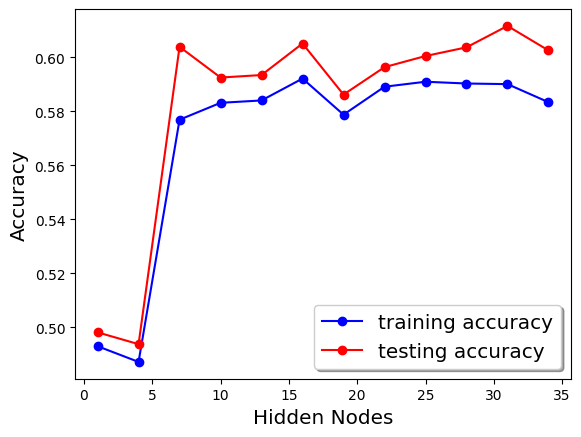

In [96]:
# Find the best # of hidden nodes
hidden_range = range(1,35,3)

train_accuracy = []
test_accuracy = []

for h in hidden_range:
    mlp_reg = neural_network.MLPRegressor(activation ='relu', hidden_layer_sizes=(h,),
                    max_iter= 30000, solver = 'adam')
    mlp_reg.fit(X_train, y_train)
    train_accuracy.append(mlp_reg.score(X_train, y_train))
    test_accuracy.append(mlp_reg.score(X_test, y_test))

#Plot the train & test accuracy
plt.plot(hidden_range, train_accuracy, 'bo-', label ='training accuracy')
plt.plot(hidden_range, test_accuracy, 'ro-', label = 'testing accuracy')

plt.xlabel('Hidden Nodes', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [99]:
# Final mlp model
mlp_reg = neural_network.MLPRegressor(activation ='relu', hidden_layer_sizes=(15,),
                    max_iter= 30000, solver = 'adam')
mlp_reg.fit(X_train,y_train)

print('train_mae:', mean_absolute_error(mlp_reg.predict(X_train), y_train),
      '\n test_mae:', mean_absolute_error(mlp_reg.predict(X_test), y_test))

train_mae: 737.3243856296925 
 test_mae: 718.6052299600756
